In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
def prox_logistic(x, lmd=1):
    def f(t):
        return np.log(1 + np.exp(-t)) + (t - x)**2/(2*lmd)
    return sp.optimize.minimize(f, x).x[0]

def envelope_logistic(x, lmd=1):
    def f(t):
        return np.log(1 + np.exp(-t)) + (t - x)**2/(2*lmd)
    return sp.optimize.minimize(f, x).fun

def logistic_grad(x):
    return -1/(1 + np.exp(x))

In [3]:
def get_prox_plot(lmd_list, xmin=-10, xmax=20, npoints=1000):
    x_val = np.linspace(xmin, xmax, npoints)
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 3.3), dpi=100, constrained_layout=True)
    for idx, lmd in enumerate(lmd_list):
        ax = axs[idx]
        ax.plot(x_val, [prox_logistic(x, lmd=lmd) for x in x_val], label='proxop', color='k')
        ax.plot(x_val, x_val, label='diagonal', linestyle='--', color='k')
        ax.set_xlabel('$x$', fontsize=16)
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.set_title(rf'$\lambda =$ {lmd:,}', fontsize=18)
        ax.set_aspect('equal')
    plt.savefig(f'prox_lambda.pdf')
    return None

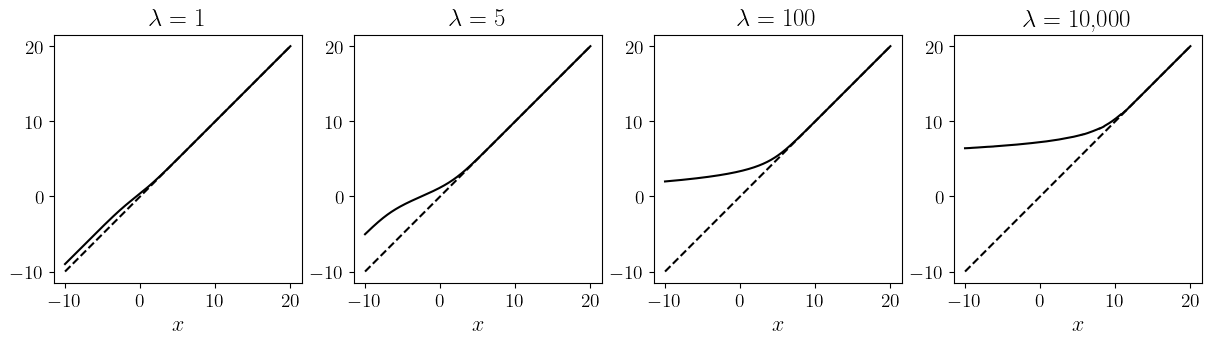

In [4]:
get_prox_plot(np.array([1, 5, 100, 10000]))